# Cirular Doubly Linked List
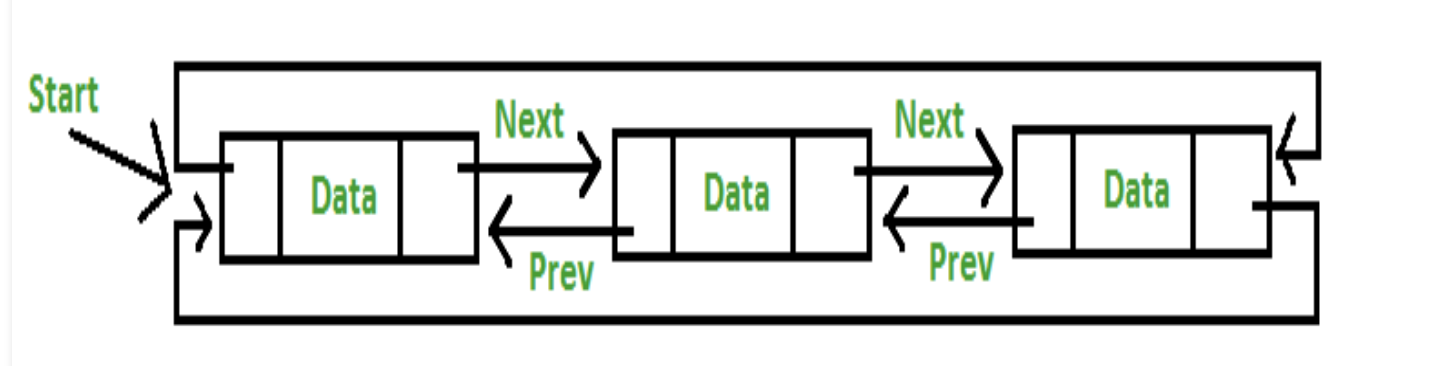

## Properties
- each node has a reference to next and previous nodes
- last node's next pointer points to first node, and first node's prev pointer points to last node
- advatanges
    - can traverse in both directions
    - can jump from head to tail or vice versa in constant O(1) time
    - can be used to implement more advanced data structures like fibanocci heap
- disadvantages
    - slightly more memory usage to account for prev pointers
    - many pointers need to be accounted for --> easy to lose data
- example uses:
    - songs in spotify playlist (without shuffle)

## Implementation

In [1]:
class Node:
    def __init__(self, data=None, next_node=None, prev=None):
        self.data = data
        self.next_node = next_node
        self.prev = prev

In [2]:
class CDLL:
    def __init__(self):
        self.last = None
        self.count = 0
    
    def traverse(self):
        temp = self.last.next
        while temp:
            print(temp.data)
            temp = temp.next
            if temp == self.last.next:
                break
                
    def append(self, value):
        temp = Node(value)
        if (self.last == None):
            self.last = temp
            self.last.next = temp
            self.last.prev = temp
        else:
            temp.next = self.last.next
            temp.prev = self.last
            self.last.next = temp
            self.last.next.prev = temp
        self.count += 1
    
    def append_right(self, value):
        temp = Node(value)
        if (self.last == None):
            self.last = temp
            self.last.next = temp
            self.last.prev = temp
        else:
            temp.next = self.last.next
            temp.prev = self.last
            self.last.next = temp
            self.last.next.prev = temp
            self.last = temp
        self.count += 1
    
    def insert(self, value, loc):
        if loc == self.count:
            self.append_right(value)
        elif loc == 0:
            self.append(value)
        else:
            temp = Node(value)
            node = self.last.next
            index = 0
            while index < loc-1:
                node = node.next
                index+=1
            temp.next = node.next
            temp.prev = node
            node.next = temp
            node.next.prev = temp
            self.count += 1
            
    def pop(self):
        self.last.next.next.prev = self.last
        self.last.next = self.last.next.next
        self.count -= 1
    
    def pop_right(self):
        node = self.last.next
        while node.next != self.last:
            node = node.next
        node.next = self.last.next
        self.last.next.prev = node
        self.last = node
        self.count -= 1
    
    def remove(self, loc):
        if loc == self.count:
            self.pop_right()
        elif loc == 0:
            self.pop()
        else:
            node = self.last.next
            index = 0
            while index < loc-1:
                node = node.next
                index += 1
            node.next = node.next.next
            node.next.next.prev = node
            self.count -= 1
    
    def size(self):
        return self.count


In [5]:
a = CDLL()
a.append(0)
a.append(1)
a.append(2)
a.append(3)
a.append_right(-1)
a.append_right(-2)
a.append_right(-3)
a.insert(33, 3)
a.pop()
a.pop_right()
a.remove(2)
a.traverse()
print('\n{} elements'.format(a.size()))

2
1
0
-1
-2

5 elements
